### Reference : https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

In [4]:
%matplotlib inline
from matplotlib.pylab import plt

#import plotly.figure_factory as ff
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.express as px

import pandas as pd

In [6]:
import pandas as pd
data = pd.read_csv("data/IPG2211A2N.csv",index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [7]:
data.index = pd.to_datetime(data.index)
data.columns = ['Energy Production']

<AxesSubplot:xlabel='DATE'>

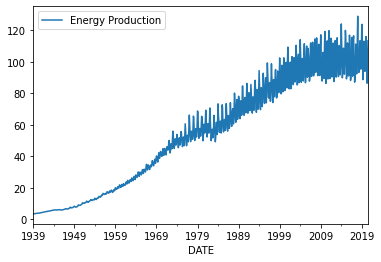

In [8]:
data.plot()

In [15]:
data = data.loc['1985-01-01':'2018-12-31']


In [16]:
data.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


# Decomposition

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')

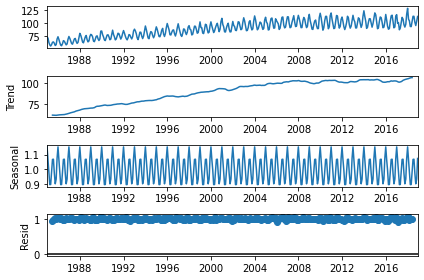

In [18]:
resplot = result.plot()

# Seasonal ARIMA

One simple approach is to perform a grid search over multiple values of p,d,q,P,D,and Q using some sort of performance criteria. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. 

In [19]:
from pmdarima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1853.032, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2079.730, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2011.606, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1903.903, Time=0.26 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1853.141, Time=0.67 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1851.650, Time=2.42 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1849.416, Time=2.07 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1830.777, Time=3.56 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1837.137, Time=2.01 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1871.984, Time=2.99 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1899.363, Time=2.57 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=1832.643, Time=4.56 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1832.568, Time=4.03 sec
 ARIMA(0,1,0)(2,1,2)[12]

In [20]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

## Train

In [21]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

# Evaluation

In [28]:
future_forecast = stepwise_model.predict(n_periods=24)

In [29]:
print(future_forecast)

[121.44307886 109.62542441  99.7390915   89.90424286  91.72215323
 103.24301444 113.3812361  112.49257239 100.80399576  91.60388146
  95.58945234 111.67159847 120.59631147 110.51454243 101.48266568
  90.13448425  92.13845551 103.0901148  112.90705612 111.47577897
 100.91458478  91.97130197  96.449734   110.07196208]


In [30]:
len(future_forecast)

24

In [31]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

<AxesSubplot:xlabel='DATE'>

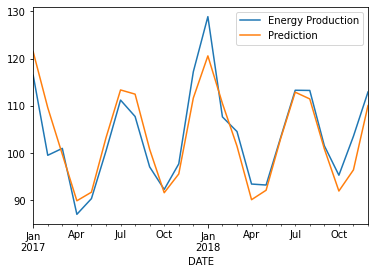

In [34]:
pd.concat([test,future_forecast],axis=1).plot()

<AxesSubplot:xlabel='DATE'>

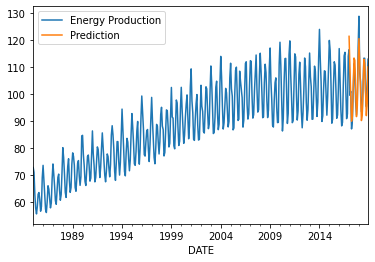

In [35]:
pd.concat([data,future_forecast],axis=1).plot()